Problem Statement:

-Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non-defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset

df = pd.read_csv(r"C:\Users\Yash Bhardwaj\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")
print("The dataset has :",df.shape[0]," number of rows.\n","The dataset has :",df.shape[1]," number of columns.")

The dataset has : 209593  number of rows.
 The dataset has : 37  number of columns.


**Data Analysis:**

In [3]:
pd.set_option('display.max_columns' , None)   #for displaying all columns

df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
#now let's check out for duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


- there are is no duplicated data present in the dataset

In [7]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.groupby(df.dtypes)

{int64: ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

- only three columns have object datatype
- Also the dataset has an unnamed column present which basically shows the index value , so let's drop it from the dataset

In [4]:
#dropping the unnamed column
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [5]:
#now let's create three new variables from date column whic are day date and month
df['Day'] = pd.to_datetime(df['pdate']).dt.day
df['Month'] = pd.to_datetime(df['pdate']).dt.month
df['Year'] = pd.to_datetime(df['pdate']).dt.year

df.sample(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
8924,1,65193I82737,1022.00000,6445.330000,6445.330,3691.69,14430.86,3.0,0.0,4917,...,0,0,0.0,0.0,0.0,UPW,2016-08-07,7,8,2016
159725,1,41248I85348,1520.00000,16.632000,16.632,539.73,539.73,-24.0,0.0,770,...,12,6,0.0,5.5,5.5,UPW,2016-06-09,9,6,2016
21071,1,01099I89230,52.00000,7.600000,7.600,665.88,665.88,0.0,0.0,0,...,6,6,0.0,0.0,0.0,UPW,2016-06-06,6,6,2016
107876,0,48065I84456,1877.00000,630.653333,635.980,0.00,0.00,0.0,0.0,0,...,6,6,0.0,0.0,0.0,UPW,2016-07-10,10,7,2016
182213,0,55404I88698,836390.97691,4.250000,4.250,977.84,977.84,4.0,0.0,770,...,12,6,0.0,0.0,0.0,UPW,2016-06-17,17,6,2016


In [10]:
#let's check out the year column
df['Year'].value_counts()

2016    209593
Name: Year, dtype: int64

- As the data is for 2016 only there is no use of Year variable, let's drop it and also drop the pdate column as it has no use as well

In [6]:
#dropping the Year column

df.drop('Year' , axis=1 , inplace=True)

In [7]:
#dropping pdate column
df.drop('pdate' , axis=1 , inplace=True)

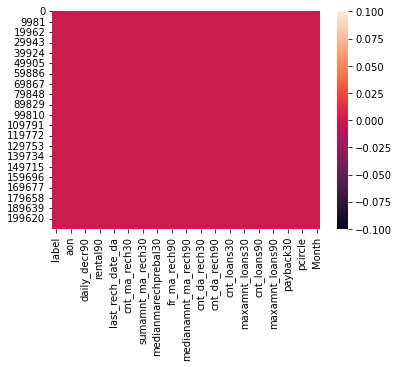

In [13]:
#checking for null values

sns.heatmap(df.isnull())
plt.show()

In [16]:
#describing the dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


Observations:
- mean for almost all features is greater than their median value which means skewness might be present
- aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.**
- aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.**
- Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.**


In [17]:
#describing object column as well
df.describe(include = object)

,msisdn,pcircle
count,209593,209593
unique,186243,1
top,04581I85330,UPW
freq,7,209593


- pcircle has only one unique class , so we can drop it from the dataset

**Data Cleaning:**

first dealing with aon variable which represent age on cellular network in days

In [19]:
df['aon'].describe()

count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

- The minimum age on network is negative while the maximum is 999860 days

In [26]:
999860/365       #checking for maximum value

2739.3424657534247

- The maximum days for age on cellular network is coming out to be 2739 years which is impossible and doesn't make sense

In [22]:
len(df.loc[df['aon']<0])   #checking out negative values

1539

In [24]:
len(df.loc[df['aon'] > 3650])         # Assume people stay one network for 10 years.

2089

Assumptions:
- All negative values are typing error happen accidentally by type - in front of original value (except feature depicting median).
- Negative values are converted into absolute value to correct negative typing error whenever applicable except feature depicting median.
- Upper limit of these features handle by outlier removal.

In [8]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

Now, lets deal with data error in maxamnt_loans30 column which is the maximum amount of loan taken by the user in last 30 days

In [27]:
df['maxamnt_loans30'].describe()

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

Remarks:
- We already know maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero.
- Also, we are making assumption here that loan amount greater than 12 to be replace with zero.

In [9]:
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

# marking values greater than 12 and assign value zero to them.

In [9]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

- the value have been replaced

Remarks:

medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    
- The median of main account balance can be negative.
- There are some very large positive values in the variable. These could be natural outliers.

cnt_loans30 : Number of loans taken by user in last 30 days

cnt_loans90 : Number of loans taken by user in last 90 days

- There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic.

**Exploratory Data Analysis**

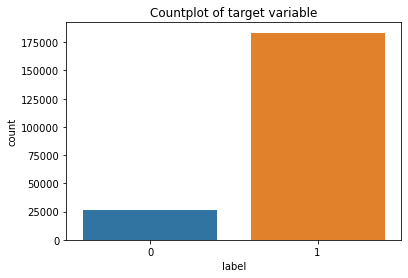

Non-defaulter: 88 %
Defaulter: 12 %


In [48]:
#plotting the target variable
sns.countplot(df['label'])
plt.title('Countplot of target variable')
plt.show()

print("Non-defaulter:",round((df['label']==1).sum()/len(df['label'])*100),'%')
print("Defaulter:",round((df['label']==0).sum()/len(df['label'])*100),'%')

- we can see the data is highly imabalanced, so we have to treat the dataset before building the machine learning models

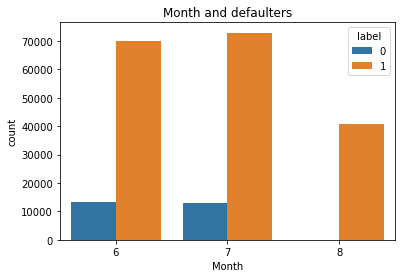

In [49]:
#plotting month variable
sns.countplot(df['Month'] , hue=df['label'])
plt.title('Month and defaulters')
plt.show()

In [56]:
len(df.loc[(df.label ==0) & (df.Month == 8)])

0

- Most of data belong to month 6 and 7, followed my month 8.
- We can see 8 month has no defaulter

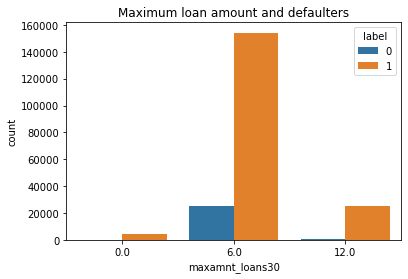

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [59]:
#plotting maximum amount of loan taken for 30 days
sns.countplot(df['maxamnt_loans30'] , hue = df['label'])
plt.title('Maximum loan amount and defaulters')
plt.show()

df['maxamnt_loans30'].value_counts()

- 6 Indonesian Rupiah is the most taken loan amount and has highest defaulter rate as well
- The rate of defaulter customer is quiet low for 12 Indonesian Rupiah loan

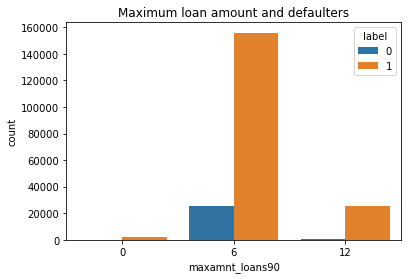

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [60]:
#plotting maximum amount of loan taken for 90 days
sns.countplot(df['maxamnt_loans90'] , hue = df['label'])
plt.title('Maximum loan amount and defaulters')
plt.show()

df['maxamnt_loans90'].value_counts()

- I think these two variables are going to be highly correlated to each other

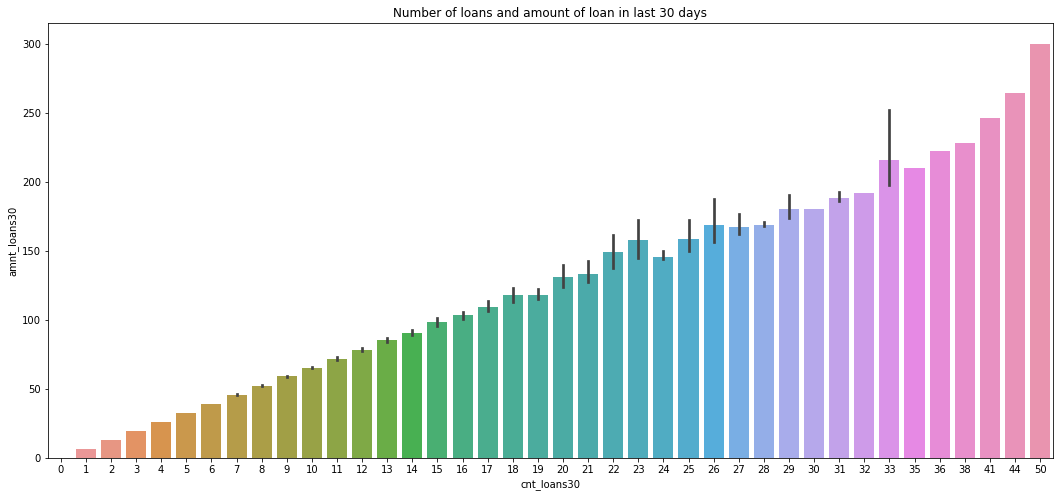

In [62]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot("cnt_loans30",'amnt_loans30', data=df)
plt.title('Number of loans and amount of loan in last 30 days')
plt.show()

Remarks:
- The maximum no. of times someone has taken a loan in last 30 days is 50 times with around 300 amount
- These two variables should have a strong correlation bond as they have a linear relationship
- The higher the count for taking a loan the higher the amount

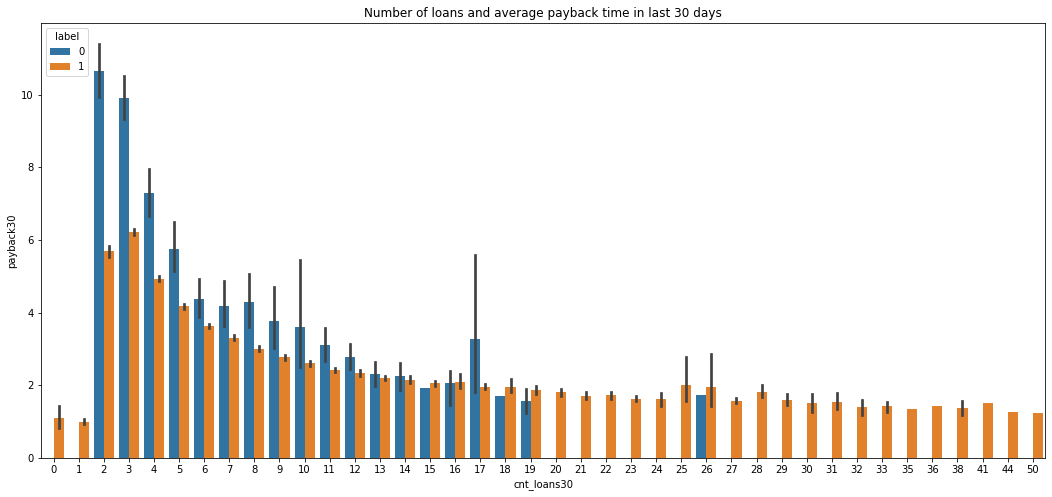

In [64]:
#Checking the number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot("cnt_loans30",'payback30',hue='label', data=df)
plt.title('Number of loans and average payback time in last 30 days')
plt.show()

- We can observe that the Average payback time over last 30 days is higher for people who had taken 2,3 times loan and we can say that the customers with more count of loans have shorter average period of days for repaying the loan

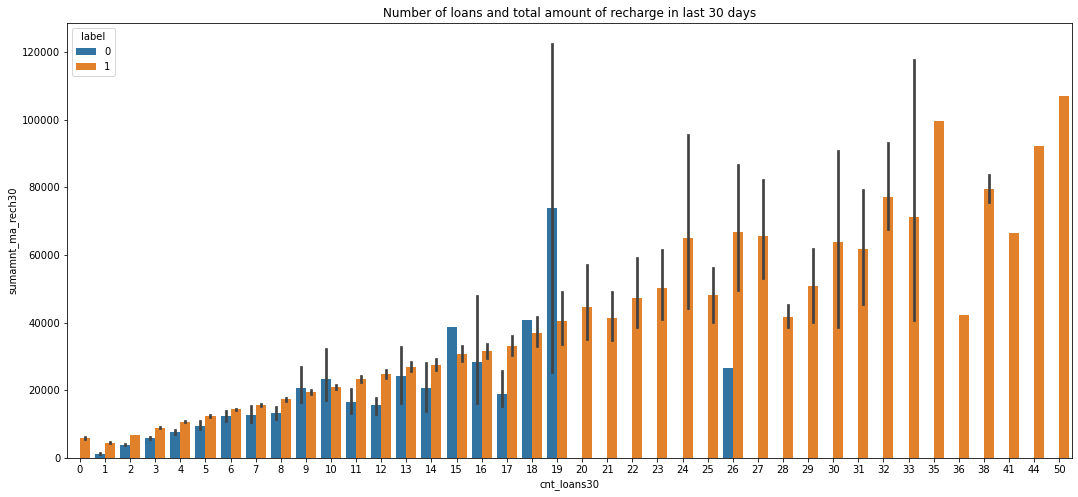

In [65]:
#plotting Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
plt.figure(figsize=(18,8))
sns.barplot("cnt_loans30",'sumamnt_ma_rech30', hue='label',data=df)
plt.title('Number of loans and total amount of recharge in last 30 days')
plt.show()

**Feature Engineering**

In [10]:
#firstly we will drop pcircle and msisdn variables as they have no use

df.drop(['pcircle','msisdn'] , axis=1 , inplace=True)

In [11]:
df.columns.groupby(df.dtypes)     #again checking for columns

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']}

- Now only integer type variables are present

OUTLIERS

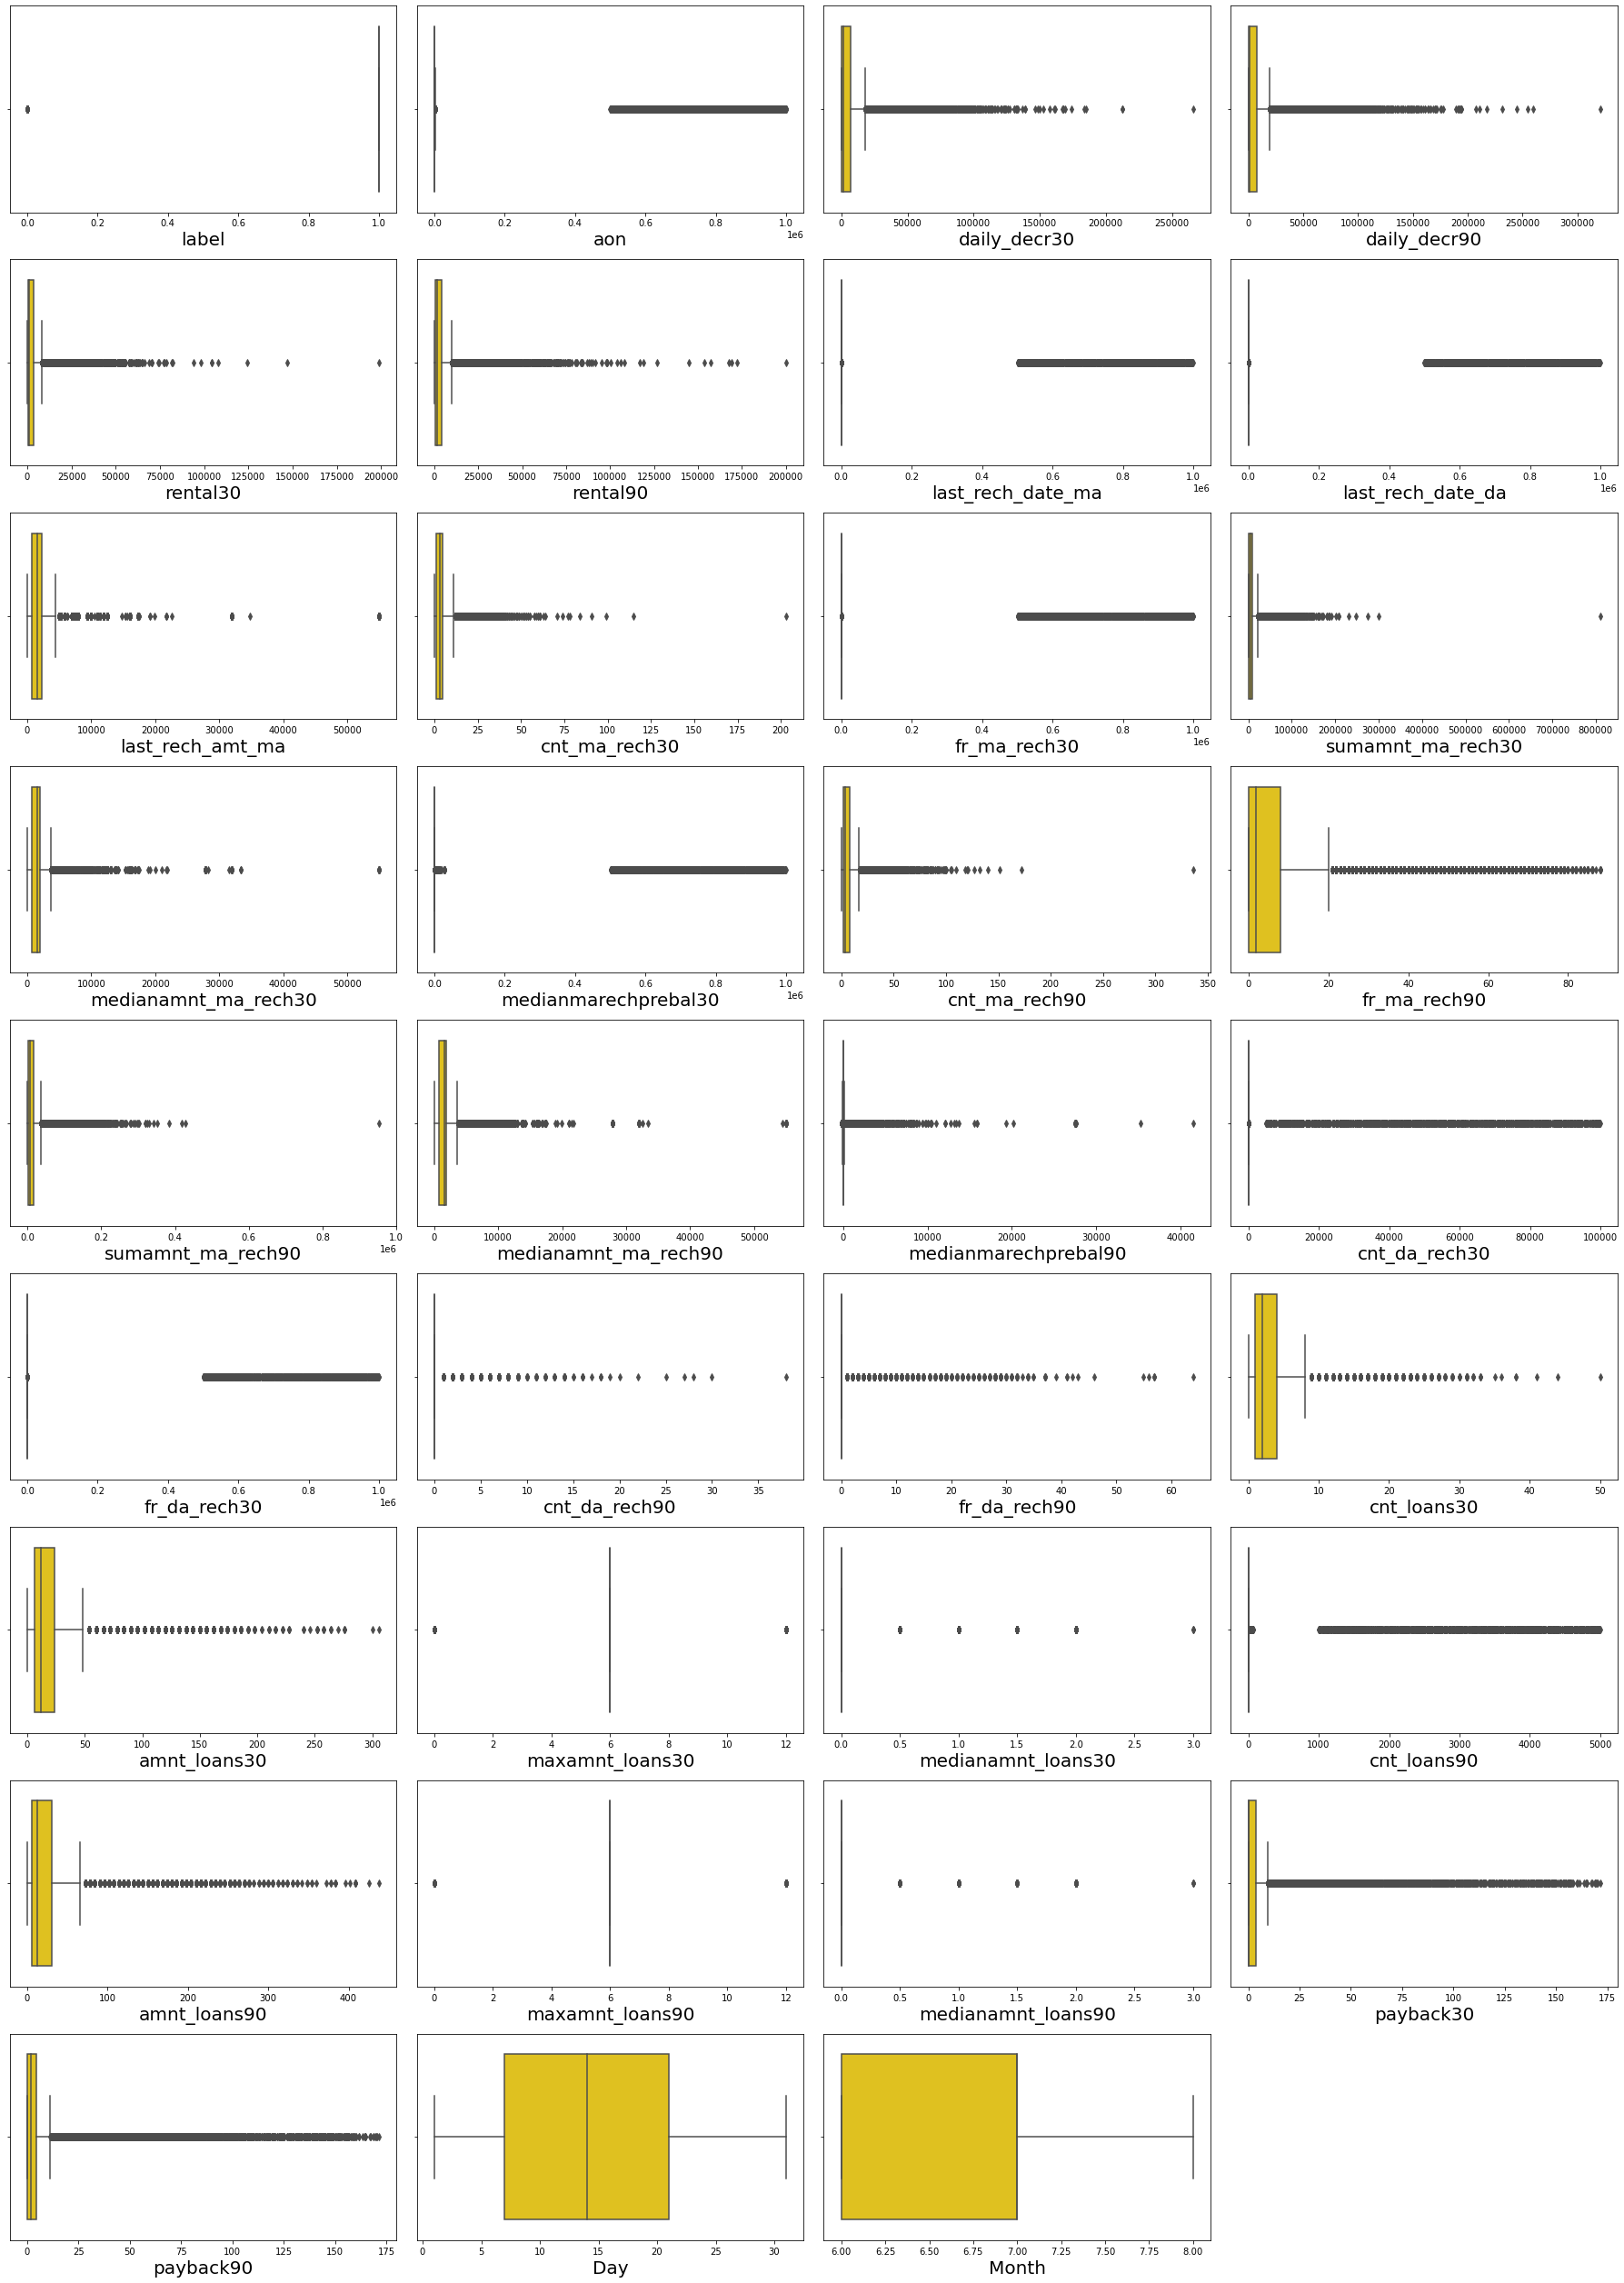

In [70]:
#checking for outliers

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- We can see many outliers are present throughout the dataset

In [72]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [73]:
#lets check out a few zscore values
z.iloc[209587,30]

4.753189062627214

- Yes the value is above 3 

In [74]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [75]:
print("Data loss is",(df.shape[0] - df_new.shape[0])/df.shape[0]*100,'%')

Data loss is 23.423492196781382 %


- Okay so as the data loss is around 23 % which is pretty much we can't use zscore method for outliers removal so we have to go with IQR method

Remarks:
- In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.
- Upper bound set as 99th percentile as most of values in dataset are realistic but still there are few very extreme values
- No Outliers in lower bound so Lower bound is set as 0th percentile.

In [11]:
Q1 = df.quantile(0)
Q3= df.quantile(.99)
IQR = Q3 - Q1
print(IQR)

label                       1.000000
aon                      2419.080000
daily_decr30            41730.440000
daily_decr90            49967.383600
rental30                19465.962000
rental90                26997.968000
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.440000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.540000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.240000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.196400
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [12]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]       #applying the IQR method

In [13]:
print("Data loss is",(df.shape[0] - df_new.shape[0])/df.shape[0]*100,'%')

Data loss is 5.44770102054935 %


- As the data loss is only 5% and which is in the permissible limit so we are going to use the new dataset for further process

SKEWNESS

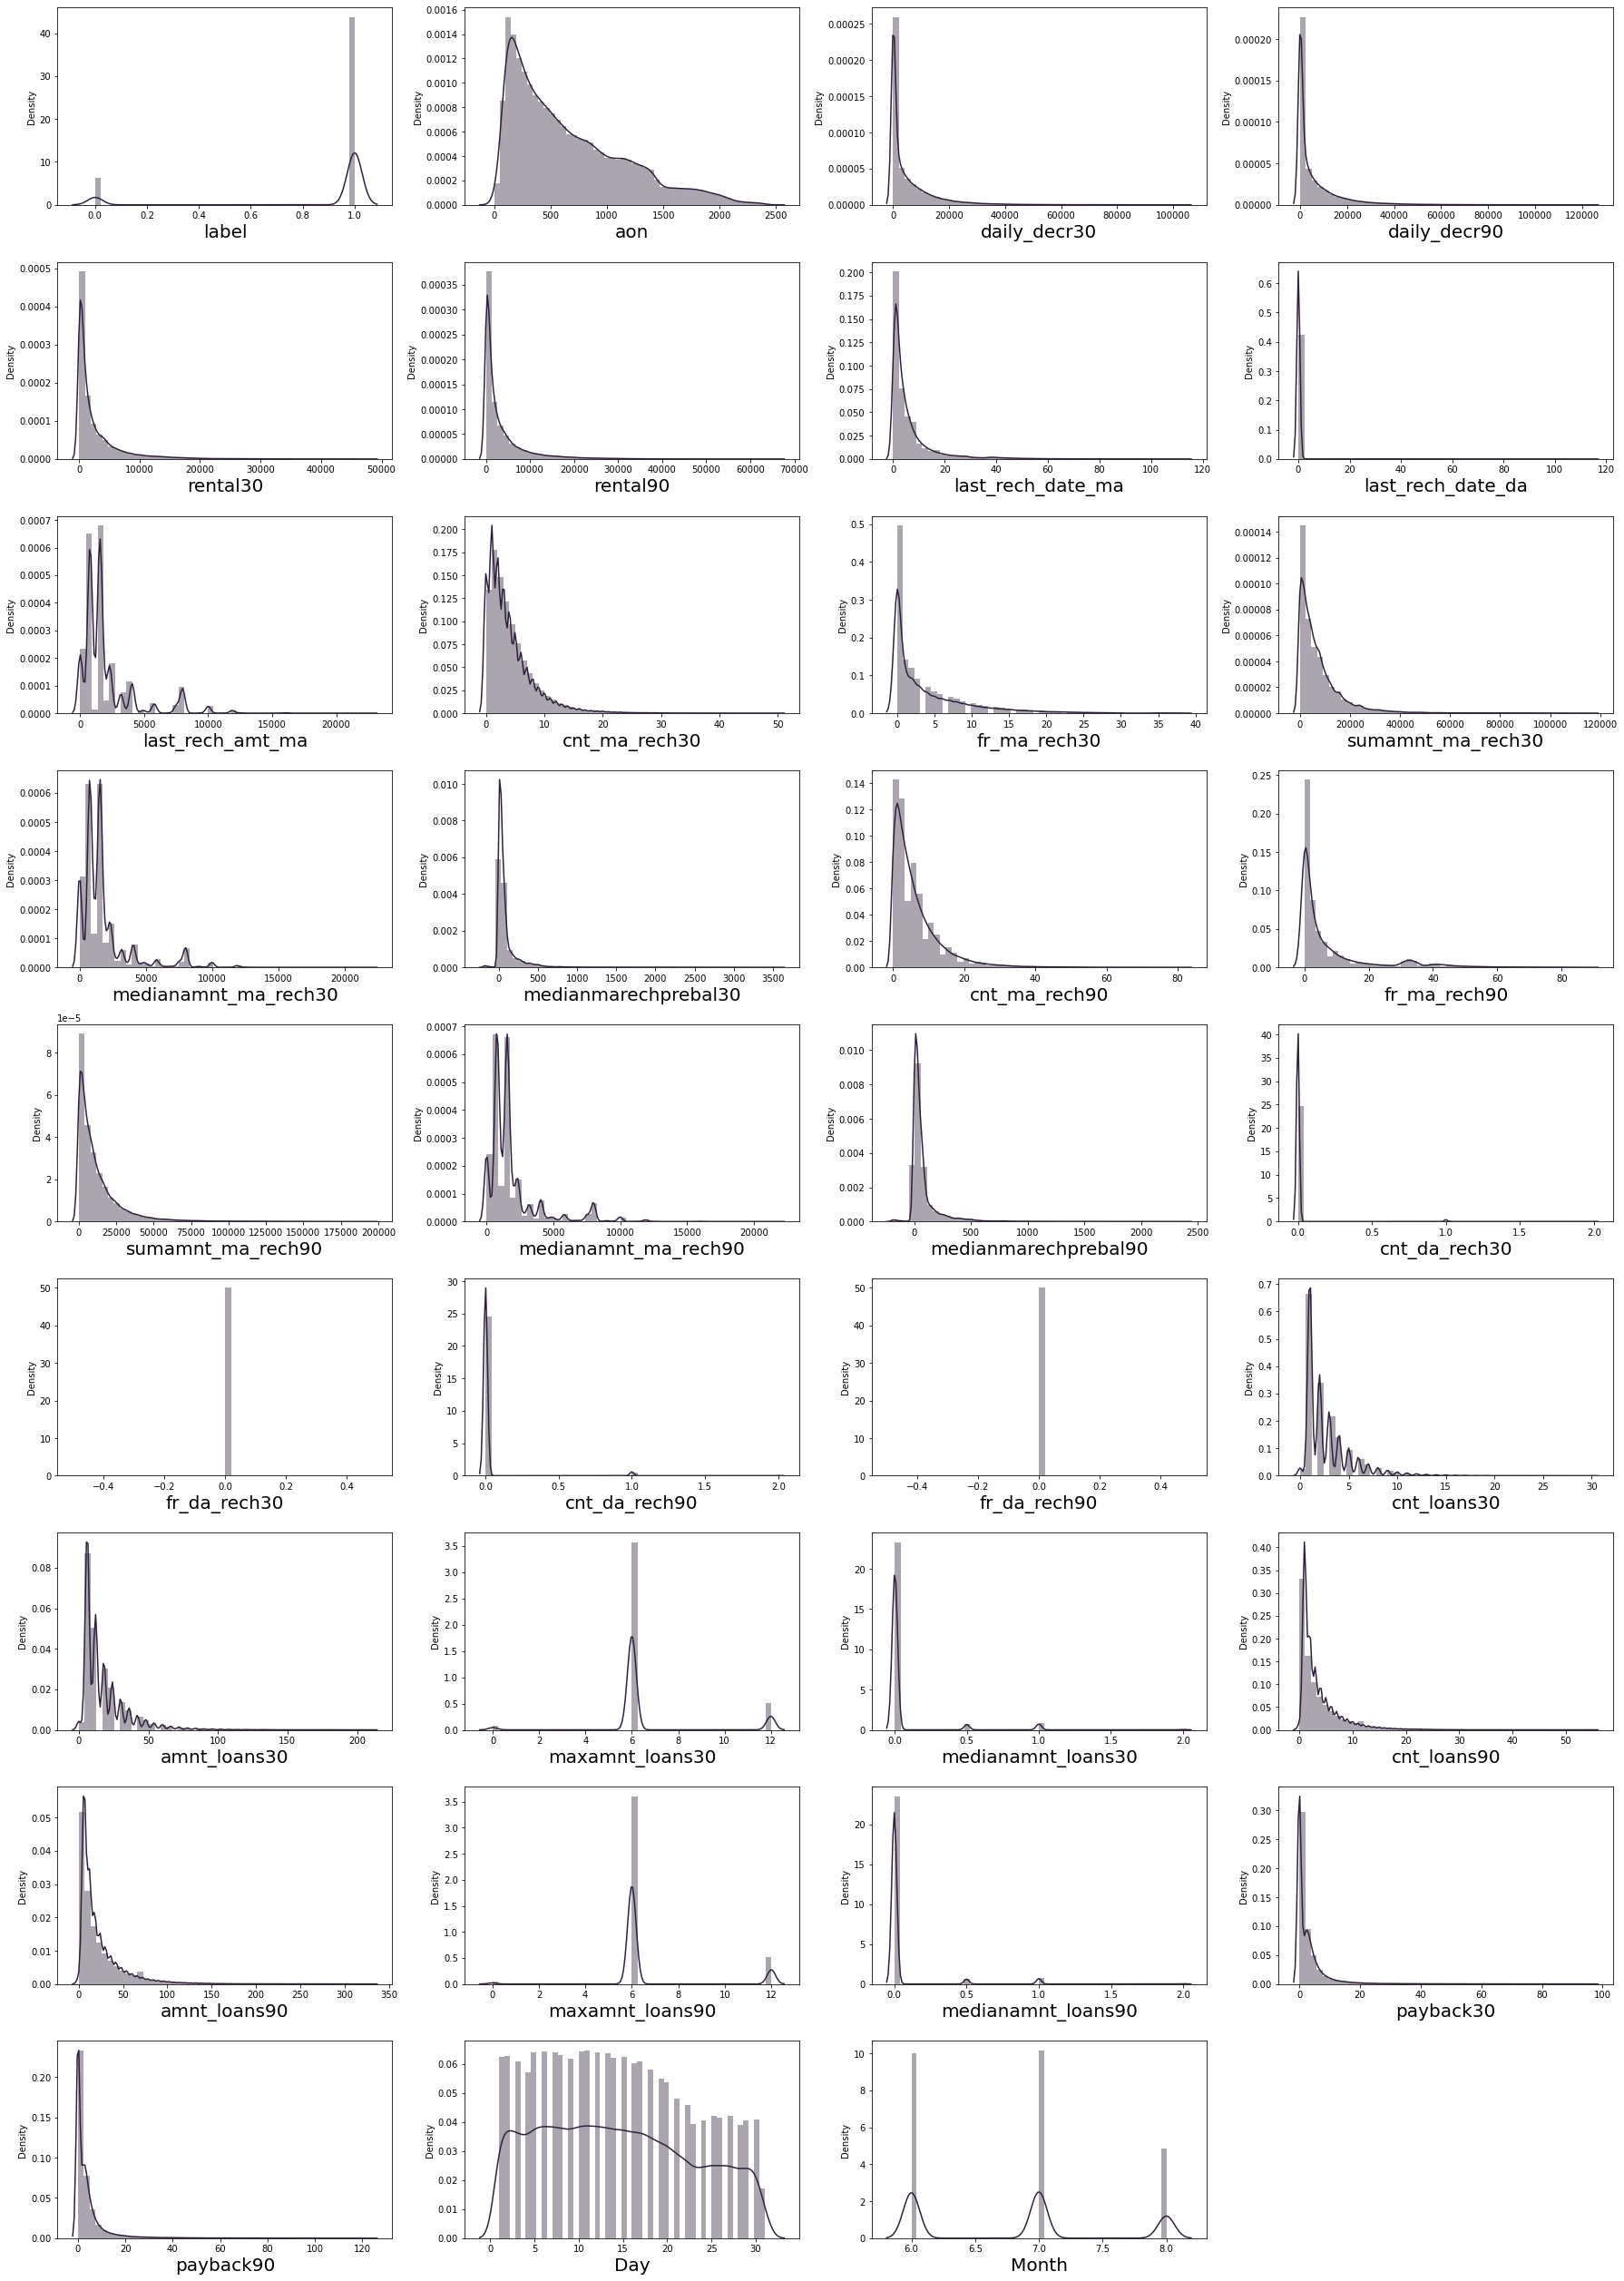

In [83]:
#checking for skewness

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
sns.set_palette('mako')
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- as we have seen before as well that the mean was greater than the median values of many columns

In [100]:
#let's use pandas .skew() function
df_new.skew()

label                   -2.271917
aon                      0.953366
daily_decr30             3.105450
daily_decr90             3.271944
rental30                 3.099035
rental90                 3.254867
last_rech_date_ma        3.474767
last_rech_date_da       10.002375
last_rech_amt_ma         2.299556
cnt_ma_rech30            2.353905
fr_ma_rech30             2.022710
sumamnt_ma_rech30        3.126545
medianamnt_ma_rech30     2.511199
medianmarechprebal30     6.367336
cnt_ma_rech90            2.583014
fr_ma_rech90             2.282762
sumamnt_ma_rech90        3.170529
medianamnt_ma_rech90     2.528502
medianmarechprebal90     5.600065
cnt_da_rech30           10.650462
fr_da_rech30             0.000000
cnt_da_rech90            7.349610
fr_da_rech90             0.000000
cnt_loans30              2.502408
amnt_loans30             2.643727
maxamnt_loans30          1.248755
medianamnt_loans30       4.534420
cnt_loans90              2.797470
amnt_loans90             2.876434
maxamnt_loans9

In [101]:
df_new['fr_da_rech30'].value_counts()

0.0    198175
Name: fr_da_rech30, dtype: int64

In [102]:
df_new['fr_da_rech90'].value_counts()

0    198175
Name: fr_da_rech90, dtype: int64

- these variables only have zero values present which means there's no point in keeping them
- Also let the threshold for skewness be +/- 0.35 except Day and Month all the features are exceeding the threshold limit so transformation needs to be done but we won't do transformation on our target variable

In [14]:
# Droping unncessary column
df_new.drop(['fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

In [15]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [16]:
#using power transformer for transformation and skewness removal

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [17]:
df_new[skew_fea] = scaler.fit_transform(df_new[skew_fea].values)

In [19]:
#again checking for skewness

df_new.skew()

label                  -2.271917
aon                    -0.056856
daily_decr30           -0.130883
daily_decr90           -0.120818
rental30               -0.044563
rental90               -0.044552
last_rech_date_ma       0.041793
last_rech_date_da       6.421032
last_rech_amt_ma       -0.083882
cnt_ma_rech30          -0.001234
fr_ma_rech30            0.136361
sumamnt_ma_rech30      -0.314228
medianamnt_ma_rech30   -0.206000
medianmarechprebal30    1.286926
cnt_ma_rech90          -0.003740
fr_ma_rech90            0.143565
sumamnt_ma_rech90      -0.214061
medianamnt_ma_rech90   -0.066139
medianmarechprebal90    1.464526
cnt_da_rech30           9.681414
cnt_da_rech90           6.688841
cnt_loans30             0.036998
amnt_loans30            0.002738
maxamnt_loans30         0.427389
medianamnt_loans30      3.452258
cnt_loans90             0.097593
amnt_loans90           -0.008161
maxamnt_loans90         0.367233
medianamnt_loans90      3.782971
payback30               0.296428
payback90 

- For most of the features skewness has been reduced

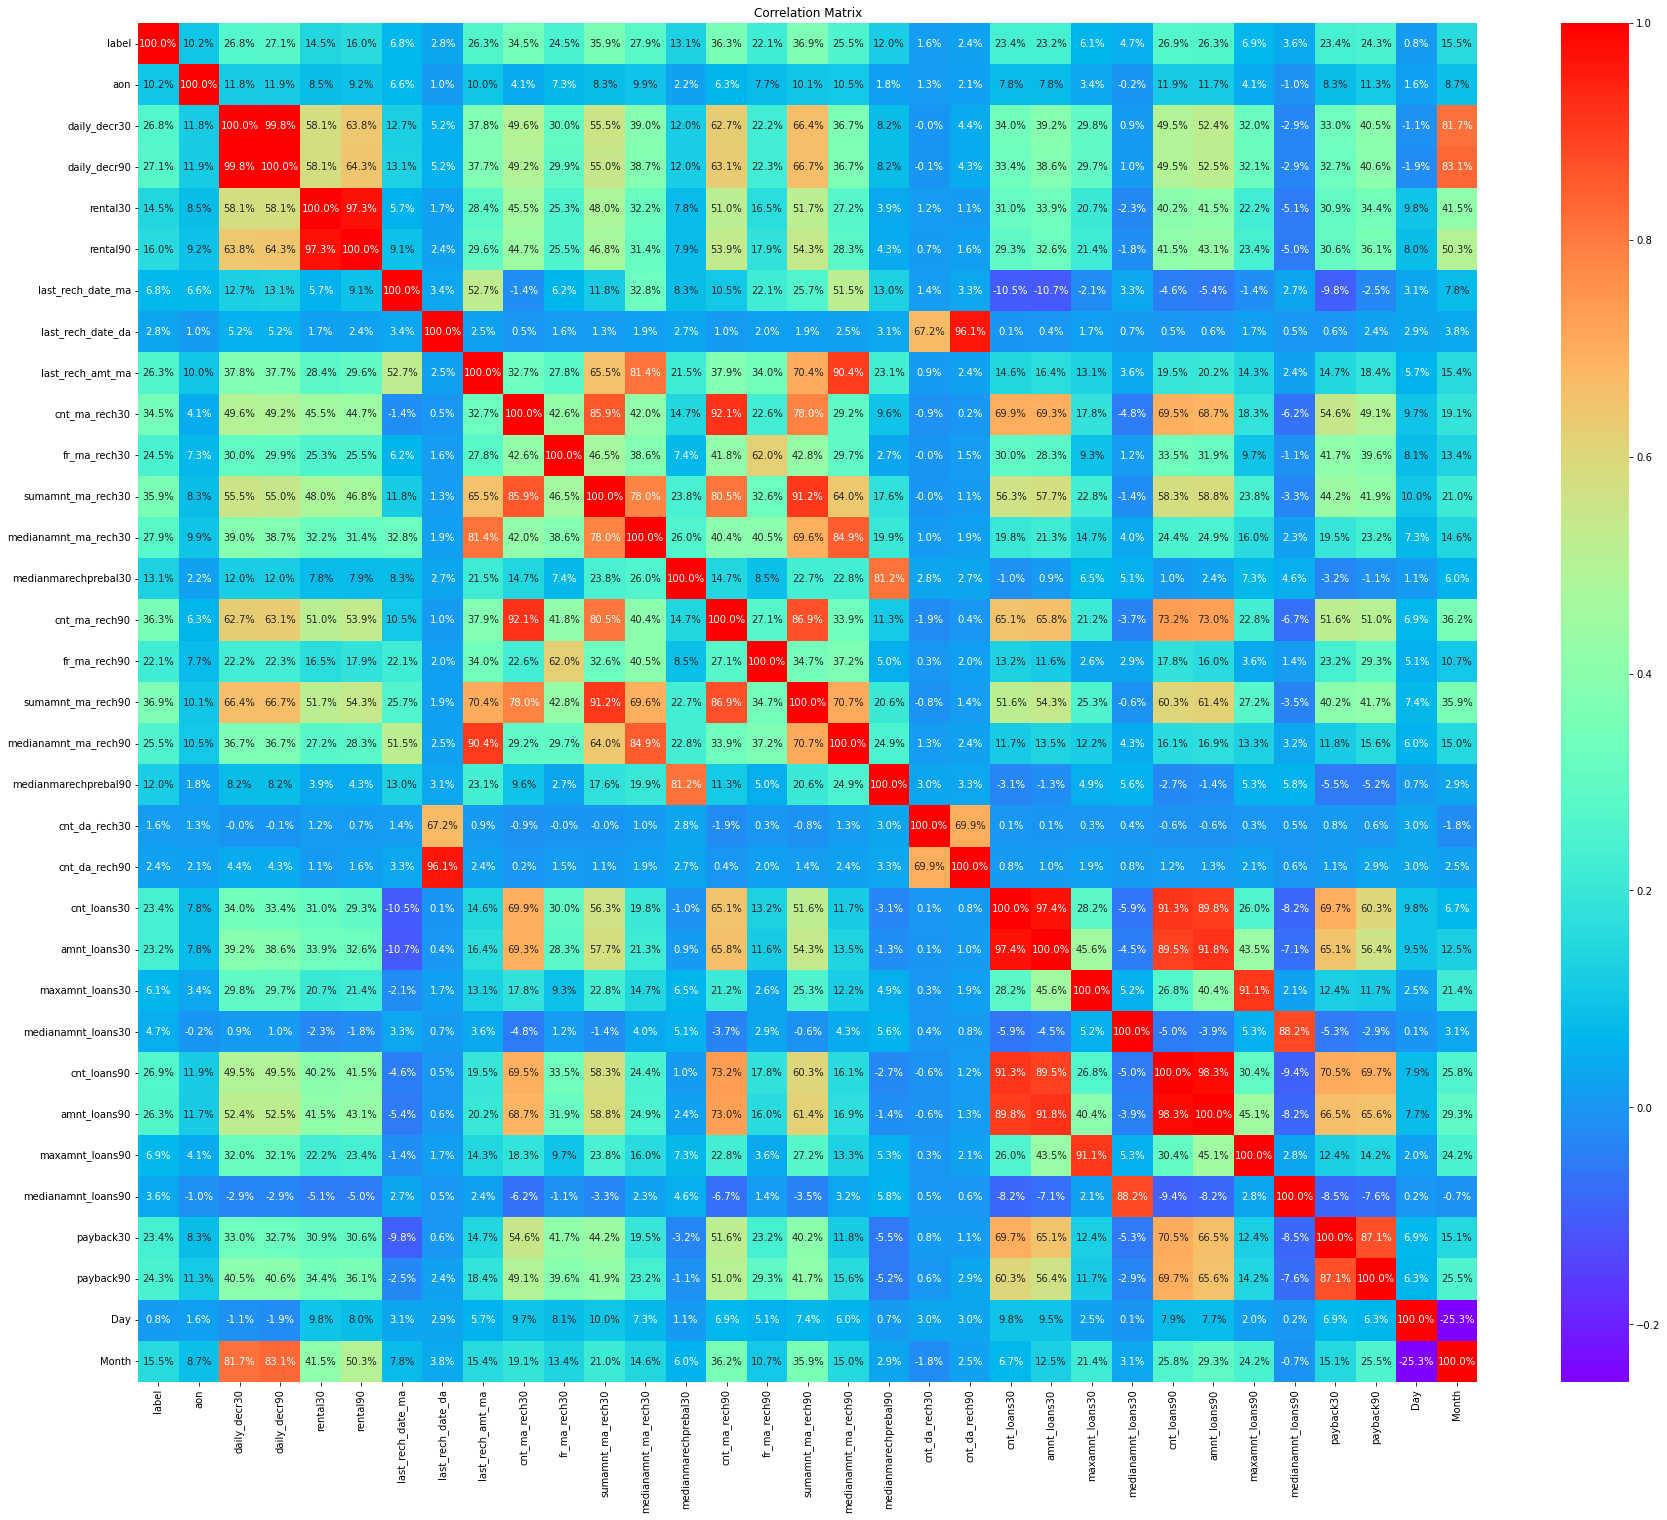

In [113]:
#checking for correlation

#correlation matrix
plt.figure(figsize=(30,25))
plt.title("Correlation Matrix")
sns.heatmap(df_new.corr(), cmap='rainbow', annot=True, fmt='.1%')
plt.show()

- We can see that the features are highly correlated with each other in some cases

In [114]:
#correlation with target variable
df_new.corr()['label'].sort_values(ascending=False)

label                   1.000000
sumamnt_ma_rech90       0.368845
cnt_ma_rech90           0.362887
sumamnt_ma_rech30       0.358907
cnt_ma_rech30           0.345216
medianamnt_ma_rech30    0.279250
daily_decr90            0.270629
cnt_loans90             0.269460
daily_decr30            0.268143
amnt_loans90            0.263466
last_rech_amt_ma        0.263309
medianamnt_ma_rech90    0.254778
fr_ma_rech30            0.245368
payback90               0.242821
payback30               0.234467
cnt_loans30             0.234154
amnt_loans30            0.232137
fr_ma_rech90            0.221342
rental90                0.159673
Month                   0.155284
rental30                0.144528
medianmarechprebal30    0.130770
medianmarechprebal90    0.120481
aon                     0.102184
maxamnt_loans90         0.069271
last_rech_date_ma       0.067788
maxamnt_loans30         0.061451
medianamnt_loans30      0.046535
medianamnt_loans90      0.036254
last_rech_date_da       0.027738
cnt_da_rec

**SPLITTING THE DATA**

In [18]:
x = df_new.drop('label' , axis=1)
y = df_new['label']

print("Shape of X:",x.shape)
print("Shape of Y:",y.shape)

Shape of X: (198175, 32)
Shape of Y: (198175,)


In [21]:
#Now checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():        #defining a function which returns VIF value for features
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [22]:
vif_calc()

    VIF Factor              features
0     1.041828                   aon
1   401.639269          daily_decr30
2   422.978455          daily_decr90
3    25.929876              rental30
4    29.218408              rental90
5     1.977995     last_rech_date_ma
6    13.334612     last_rech_date_da
7     6.748248      last_rech_amt_ma
8    55.246941         cnt_ma_rech30
9     2.071280          fr_ma_rech30
10   87.294048     sumamnt_ma_rech30
11   17.564612  medianamnt_ma_rech30
12    3.194244  medianmarechprebal30
13   61.754080         cnt_ma_rech90
14    1.904566          fr_ma_rech90
15   81.625154     sumamnt_ma_rech90
16   18.283893  medianamnt_ma_rech90
17    3.176257  medianmarechprebal90
18    1.967054         cnt_da_rech30
19   14.290279         cnt_da_rech90
20  162.030603           cnt_loans30
21  173.541702          amnt_loans30
22    8.479614       maxamnt_loans30
23    4.632107    medianamnt_loans30
24  232.189012           cnt_loans90
25  249.538202          amnt_loans90
2

Remarks:
- VIF in range 2-10 is acceptable though a VIF below than 5 is best
- In this case we can't just drop the highly correlated features and get rid of the multicollinearity instead of this we will use PCA transformation
- Before that let's split the data into training and testing sets

In [19]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state = 0 , stratify = y)

print("X TRAIN SIZE:",x_train.shape)
print("Y TRAIN SIZE:",y_train.shape)

print("\nX TEST SIZE:",x_test.shape)
print("Y TEST SIZE:",y_test.shape)

X TRAIN SIZE: (132777, 32)
Y TRAIN SIZE: (132777,)

X TEST SIZE: (65398, 32)
Y TEST SIZE: (65398,)


In [20]:
#lets first scale the data

from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

x_train = stc.fit_transform(x_train)
x_test = stc.transform(x_test)               #using .transform() only for test dataset

- Since the dataset is highly imbalanced, I am going to use SMOTE for over sampling the minority class for training data only and not the test set as this can allow model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [25]:
#checking for value counts
y_train.value_counts()

1    116219
0     16558
Name: label, dtype: int64

In [21]:
#applying SMOTE over sampling to deal with the imbalanced dataset 

from imblearn.over_sampling import SMOTE

smt = SMOTE()

train_x , train_y = smt.fit_resample(x_train , y_train)

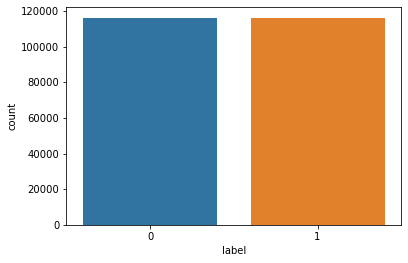

In [22]:
#now checking the value counts

sns.countplot(train_y)
plt.show()

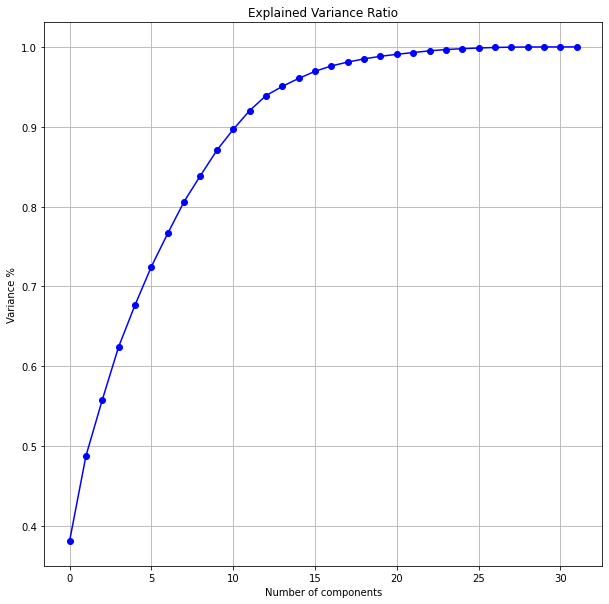

In [23]:
#plot the graph to find the principal components

from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(train_x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

Remarks:
- we can see that as per the graph, 10 principal components attribute for 90% of variation in the data.  We shall pick the first 10 components for the predictions.

In [24]:
#applying pca on features

pca = PCA(n_components=10)
train_x = pca.fit_transform(train_x)               #using .fit_transform() for training set
x_test = pca.transform(x_test)                     #using .transform() for testing set

**Building Models**

In [25]:
#Importing Machine learning Model and metrics library 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc

1. Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(train_x , train_y)
predlr = lr.predict(x_test)

In [27]:
acc_lr = round(accuracy_score(y_test , predlr)*100,2)

print("Accuracy score for Logistic Regression Model:",acc_lr)
print("\n Confusion Matrix for Logistic Regression:\n",confusion_matrix(y_test , predlr))
print("\nClassification report for Logistic Regression:\n",classification_report(y_test , predlr))

Accuracy score for Logistic Regression Model: 75.4

 Confusion Matrix for Logistic Regression:
 [[ 6177  1978]
 [14111 43132]]

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.30      0.76      0.43      8155
           1       0.96      0.75      0.84     57243

    accuracy                           0.75     65398
   macro avg       0.63      0.76      0.64     65398
weighted avg       0.87      0.75      0.79     65398



In [45]:
#cross validation for logistic regression

score_lr = cross_val_score(lr,x,y,cv=5)

print("Scores:",score_lr,'\n')
print("Mean:",score_lr.mean(),'\n')
print("Standard deviation:",score_lr.std())

Scores: [0.88189731 0.87866784 0.87914722 0.87818847 0.88106472] 

Mean: 0.8797931121483538 

Standard deviation: 0.0014354734702202304


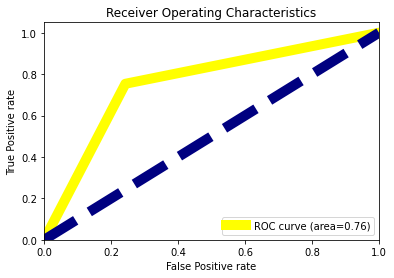

In [29]:
#roc auc plotting for logistic regression

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

2. KNeighbors Classifier

In [30]:
knn = KNeighborsClassifier()
knn.fit(train_x , train_y)
predknn = knn.predict(x_test)

In [31]:
acc_knn = round(accuracy_score(y_test , predknn)*100,2)

print("Accuracy score for KNeighbors Classifier Model:",acc_knn)
print("\n Confusion Matrix for KNeighbors:\n",confusion_matrix(y_test , predknn))
print("\nClassification report for KNeighbors Classifier:\n",classification_report(y_test , predknn))

Accuracy score for KNeighbors Classifier Model: 80.16

 Confusion Matrix for KNeighbors:
 [[ 5921  2234]
 [10743 46500]]

Classification report for KNeighbors Classifier:
               precision    recall  f1-score   support

           0       0.36      0.73      0.48      8155
           1       0.95      0.81      0.88     57243

    accuracy                           0.80     65398
   macro avg       0.65      0.77      0.68     65398
weighted avg       0.88      0.80      0.83     65398



In [32]:
#cross validation for KNeighbors classifier

score_knn = cross_val_score(knn,x,y,cv=5)

print("Scores:",score_knn,'\n')
print("Mean:",score_knn.mean(),'\n')
print("Standard deviation:",score_knn.std())

Scores: [0.9050082  0.90278794 0.90354485 0.90427652 0.90281317] 

Mean: 0.9036861359909171 

Standard deviation: 0.0008585101063387994


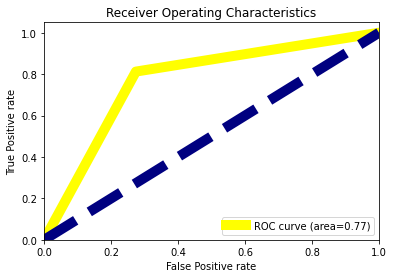

In [33]:
#roc auc plotting for KNeighbors

fpr,tpr,thresholds=roc_curve(y_test , predknn)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

3. Random Forest Classifier

In [34]:
rf = RandomForestClassifier()
rf.fit(train_x , train_y)
predrf = rf.predict(x_test)

In [35]:
acc_rf = round(accuracy_score(y_test , predrf)*100,2)

print("Accuracy score for Random Forest Classifier Model:",acc_rf)
print("\n Confusion Matrix for Random Forest Classifier:\n",confusion_matrix(y_test , predrf))
print("\nClassification report for Random Forest Classifier:\n",classification_report(y_test , predrf))

Accuracy score for Random Forest Classifier Model: 88.24

 Confusion Matrix for Random Forest Classifier:
 [[ 5377  2778]
 [ 4914 52329]]

Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58      8155
           1       0.95      0.91      0.93     57243

    accuracy                           0.88     65398
   macro avg       0.74      0.79      0.76     65398
weighted avg       0.90      0.88      0.89     65398



In [37]:
#cross validation for random forest classifier

score_rf = cross_val_score(rf,x,y,cv=3)

print("Scores:",score_rf,'\n')
print("Mean:",score_rf.mean(),'\n')
print("Standard deviation:",score_rf.std())

Scores: [0.92087376 0.92134185 0.92094826] 

Mean: 0.9210546243515075 

Standard deviation: 0.00020536425255192673


In [ ]:
#roc auc plotting for random forest

fpr,tpr,thresholds=roc_curve(y_test , predrf)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

4. XGB Classifier

In [38]:
xgb = XGBClassifier()
xgb.fit(train_x , train_y)
predxgb = xgb.predict(x_test)

In [39]:
acc_xgb = round(accuracy_score(y_test , predxgb)*100,2)

print("Accuracy score for XGB Classifier Model:",acc_xgb)
print("\n Confusion Matrix for XGB Classifier:\n",confusion_matrix(y_test , predxgb))
print("\nClassification report for XGB Classifier:\n",classification_report(y_test , predxgb))

Accuracy score for XGB Classifier Model: 83.03

 Confusion Matrix for XGB Classifier:
 [[ 6189  1966]
 [ 9129 48114]]

Classification report for XGB Classifier:
               precision    recall  f1-score   support

           0       0.40      0.76      0.53      8155
           1       0.96      0.84      0.90     57243

    accuracy                           0.83     65398
   macro avg       0.68      0.80      0.71     65398
weighted avg       0.89      0.83      0.85     65398



In [40]:
#cross validation for XGB classifier

score_xgb = cross_val_score(xgb,x,y,cv=3)

print("Scores:",score_xgb,'\n')
print("Mean:",score_xgb.mean(),'\n')
print("Standard deviation:",score_xgb.std())

Scores: [0.92225132 0.92344606 0.92324927] 

Mean: 0.9229822163789357 

Standard deviation: 0.0005230286883031655


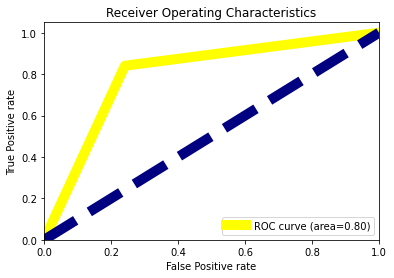

In [41]:
#roc auc plotting for xgb classifier

fpr,tpr,thresholds=roc_curve(y_test , predxgb)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

Remarks:
- By comparing the recall, precision and accuracy score random forest model is working the best
- so we will select this as the best model

**Hyperparameter Tuning**

In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV              #importing HalvingRandomSearch

In [57]:
rf = RandomForestClassifier()
params = {  
    'criterion': ['gini' , 'entropy'],                    #making the parameter grid
    'max_features': ['auto','log2','sqrt']
}

hrs = HalvingRandomSearchCV(rf, params,cv = 3)
hrs.fit(train_x, train_y)

HalvingRandomSearchCV(cv=3, estimator=RandomForestClassifier(),
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_features': ['auto', 'log2',
                                                            'sqrt']})

In [58]:
hrs.best_params_

{'max_features': 'sqrt', 'criterion': 'gini'}

In [60]:
rf_tuned = RandomForestClassifier(criterion = 'gini',                                      #re-training the model
                                  max_features = 'sqrt')
rf_tuned.fit(train_x , train_y)
predrf_tuned = rf_tuned.predict(x_test)

acc_rf_tuned = round(accuracy_score(y_test , predrf_tuned)*100,2)

print("AFTER HYPERPARAMETER TUNING\n")
print("Accuracy score for Random Forest Classifier Model:",acc_rf_tuned)
print("\n Confusion Matrix for Random Forest Classifier:\n",confusion_matrix(y_test , predrf_tuned))
print("\nClassification report for Random Forest Classifier:\n",classification_report(y_test , predrf_tuned))

AFTER HYPERPARAMETER TUNING

Accuracy score for Random Forest Classifier Model: 88.15

 Confusion Matrix for Random Forest Classifier:
 [[ 5343  2812]
 [ 4938 52305]]

Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58      8155
           1       0.95      0.91      0.93     57243

    accuracy                           0.88     65398
   macro avg       0.73      0.78      0.76     65398
weighted avg       0.90      0.88      0.89     65398



In [61]:
#cross validation for random forest classifier

score_rf_tuned = cross_val_score(rf_tuned,x,y,cv=3)

print("Scores:",score_rf_tuned,'\n')
print("Mean:",score_rf_tuned.mean(),'\n')
print("Standard deviation:",score_rf_tuned.std())

Scores: [0.92055587 0.92112992 0.92032759] 

Mean: 0.9206711245881563 

Standard deviation: 0.0003375349114193651


- the model must have become more accurate after hyperparameter tuning

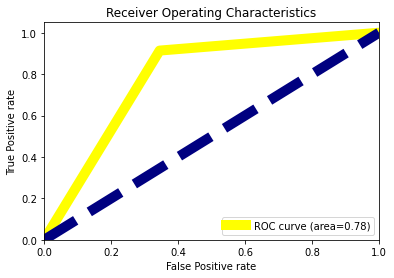

In [62]:
#roc auc plotting for final model

fpr,tpr,thresholds=roc_curve(y_test , predrf_tuned)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [63]:
#saving the best model

import pickle
pickle.dump(rf_tuned,open('defaulterprediction.pkl','wb'))

In [65]:
#loading the saved model for making predictions

model = pickle.load(open('defaulterprediction.pkl','rb'))

In [67]:
#making predictions

y_predicted = model.predict(x_test)

In [68]:
#making a dataframe

preddf = pd.DataFrame({"Actual Value":y_test , "Predicted Values":y_predicted})
preddf

,Actual Value,Predicted Values
131879,1,1
209013,1,0
87585,1,1
75080,1,1
137940,0,1
...,...,...
85076,1,1
185956,1,1
79413,1,1
115998,1,1
